
#### Name            : Saurav vara prasad Channuri
#### Roll No         : ES16BTECH11007
#### Course          : Deep learning for vision
#### Assignment  : 1
#### Question       : 4

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import sklearn
from sklearn import datasets
from sklearn.datasets import make_blobs

In [80]:
X,Y = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=None, random_state=None)
XNL2, YNL2 = sklearn.datasets.make_circles(n_samples=1000, shuffle=True, noise=None, random_state=None, factor=0.8) 

# Datasets

#### Moon dataset, Circles dataset ( Non - linear dataset )

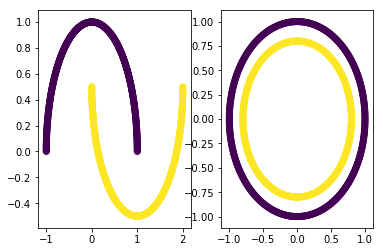

In [81]:
f,[ax1,ax2] = plt.subplots(1,2)
ax1.scatter(X.T[0], X.T[1], c = Y)
ax2.scatter(XNL2.T[0], XNL2.T[1], c = YNL2)

#### Linearly seperable dataset

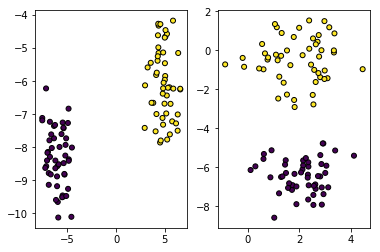

In [86]:
X1, Y1 = make_blobs(n_samples = 100,n_features=2, centers=2)
XL2, YL2 = make_blobs(n_samples = 100,n_features=2, centers=2)


f,[ax1,ax2] = plt.subplots(1,2)
ax1.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
ax2.scatter(XL2[:, 0], XL2[:, 1], marker='o', c=YL2,
            s=25, edgecolor='k')


### Perceptron Algorithm

In [83]:
def p2(data):
    
    X1        = data["X"]
    Y1        = data["Y"]
    
    tolerance = data["tolerance"]
    b         = data["b"]
    alpha     = data["alpha"]
    diff      = data["diff"]
    w         = data["w"]
    
    while(diff > tolerance):
        w_old = w
        b_old = b
        for i in range(len(X1)):
            o = np.matmul(X1[i], w) + b
            if((Y1[i] > 0) and (o < 0)):
                w = w + (X1[i])
                b = b + 1
            elif((Y1[i] == 0) and (o > 0)):
                w = w - (X1[i])
                b = b - 1
        diff = np.sum(( (w_old+b_old) - (w + b))**2)  
#         print("diff = ", diff)
    return w,b

In [112]:
def plot(data,w1,w2,b1,b2):

    X1 = data["X"]
    Y1 = data["Y"]

    X2 = data["X2"]
    Y2 = data["Y2"]
    
#     print(X1 == X2)
    xt = np.linspace(-10,10,10)
    
    outs1 = -(w1[0]*xt + b1)/w1[1] 
    outs2 = -(w2[0]*xt + b2)/w2[1] 

    f,[ax1,ax2] = plt.subplots(1,2)
    
    ax1.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
                s=25, edgecolor='k')
    ax1.plot(xt, outs1)
    
    
    ax2.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
                s=25, edgecolor='k')
    ax2.plot(xt, outs2)

In [140]:
def perceptron(data):
    
    X1        = data["X"]
    Y1        = data["Y"]
    
    X2 = data["X2"]
    Y2 = data["Y2"]
    
    w1,b1 = p2(data)
    
    data["X"] = X2
    data["Y"] = Y2
    
    data["X2"] = X1
    data["Y2"] = Y1
    
    
    w2,b2 = p2(data)
    data["X"] = X1
    data["Y"] = Y1
    
    data["X2"] = X2
    data["Y2"] = Y2
    
    w1,b1 = p2(data)
    
    plot(data, w1, w2,b1,b2)
    
#     return w1,w2,b1,b2
    

#### For linear dataset


(array([11.47258993,  0.81475521]), array([6.70853961, 7.55561837]), 1, 13)

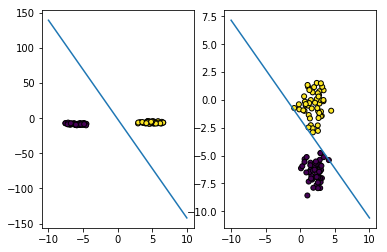

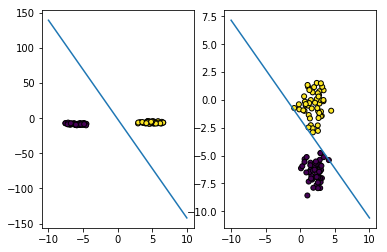

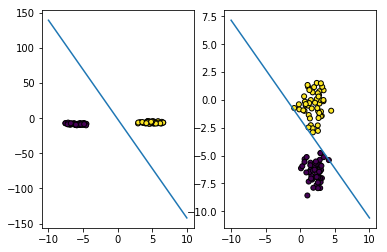

In [130]:
d11 = X1
d12 = Y1

d21 = XL2
d22 = YL2

tolerance = 0.015

data = {
            "X"         : X1,
            "Y"         : Y1,
    
            "X2"        : XL2,
            "Y2"        : YL2,
    
            "tolerance" : 0.015,
            "b"         : 0, # bias term
            "alpha"     : 0.015,
            "diff"      : tolerance + 2,
            "w"         : np.random.randint(0,15,2)
        }

perceptron(data)
perceptron(data)
perceptron(data)

# w1,b1 = p2(data)
# plot(data, w1, w2,b1,b2)

#### For non linear data

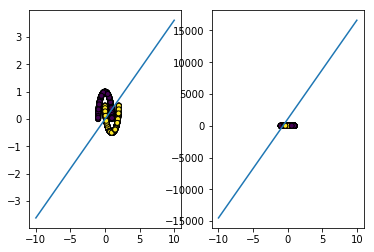

In [141]:
d11 = X
d12 = Y

d21 = XNL2
d22 = YNL2

data = {
            "X"         : d11,
            "Y"         : d12,
    
            "X2"        : d21,
            "Y2"        : d22,
    
            "tolerance" : 0.015,
            "b"         : 0, # bias term
            "alpha"     : 0.015,
            "diff"      : tolerance + 2,
            "w"         : np.random.randint(0,15,2)
        }

perceptron(data)
# plot(data, w1, w2,b1,b2)

 - the algorithm converges to a local minina of the dimension space, the local minima at which it settles down depends on the initial weights 
 
 - At each random initialization of weights, the final decision boundary at which it settles down minimizes the error but the decision boundary may not be the perfect one but is one of the solutions

#### Comparision with SVM

- In SVM, the algorithm finds the decision boundary that minimizes the geometrical margin between the two different classes. So, it gives a decision boundary that is almost equidistant from both the classes and is intuitively the best decision boundary

- In the perceptron learning algorithm, the decision boundary that we get depends on the initialization of the weights, while the decision boundary may be correct for the given training set, it may not be the best decision boundary that we can get.

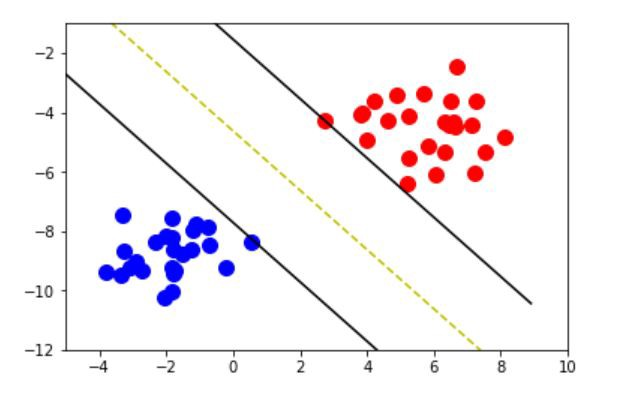

### Comparision with Logistic Regression

- Logistic regression with a cross-entropy loss is a convex function and converges to a single fixed minima on the error function.

- So, we get a single classifier that seems to be intuitively correct decision boundary.

- the observations can be seen from the images pasted

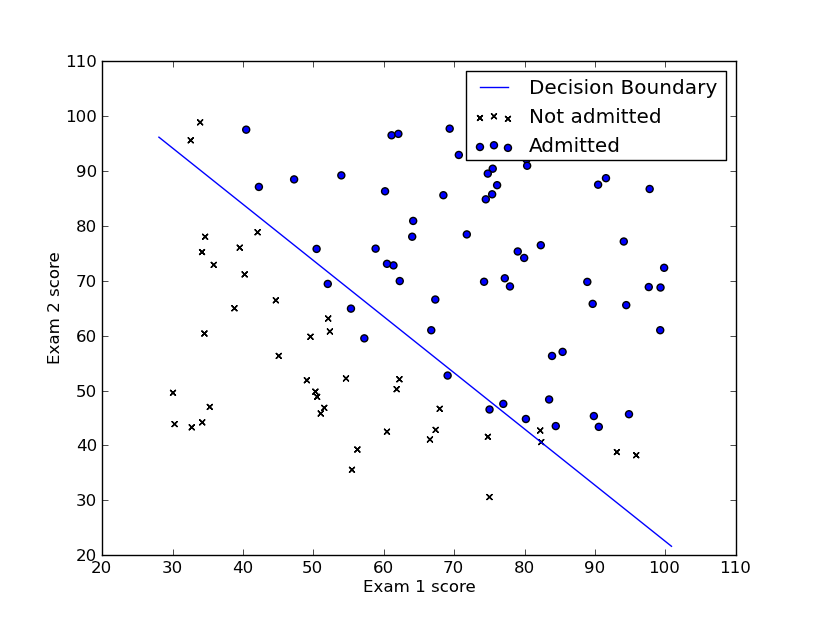